<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/M3_lab52_spam_rev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam classification example
- good example code for comparing multiple algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
!curl -L https://bit.ly/2WC9nvn -o sms_spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0   2238      0 --:--:-- --:--:-- --:--:--  2274
100   137    0   137    0     0    376      0 --:--:-- --:--:-- --:--:--   376
100   340  100   340    0     0    482      0 --:--:-- --:--:-- --:--:--     0
100  488k  100  488k    0     0   453k      0  0:00:01  0:00:01 --:--:--  453k


In [3]:
sms = pd.read_csv('sms_spam.csv', encoding='latin-1')

In [4]:
sms.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms.shape

(5574, 2)

In [6]:

x = sms['text']
y = sms['type']
sms.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- stop_words_ : terms that were ignored
- Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction. Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.

## Naive Bayes algorithm
- GaussianNB : for continuous-values features
- MultinomialNB : for discrete-value features
- but, both work in other types also.

### Multinomial

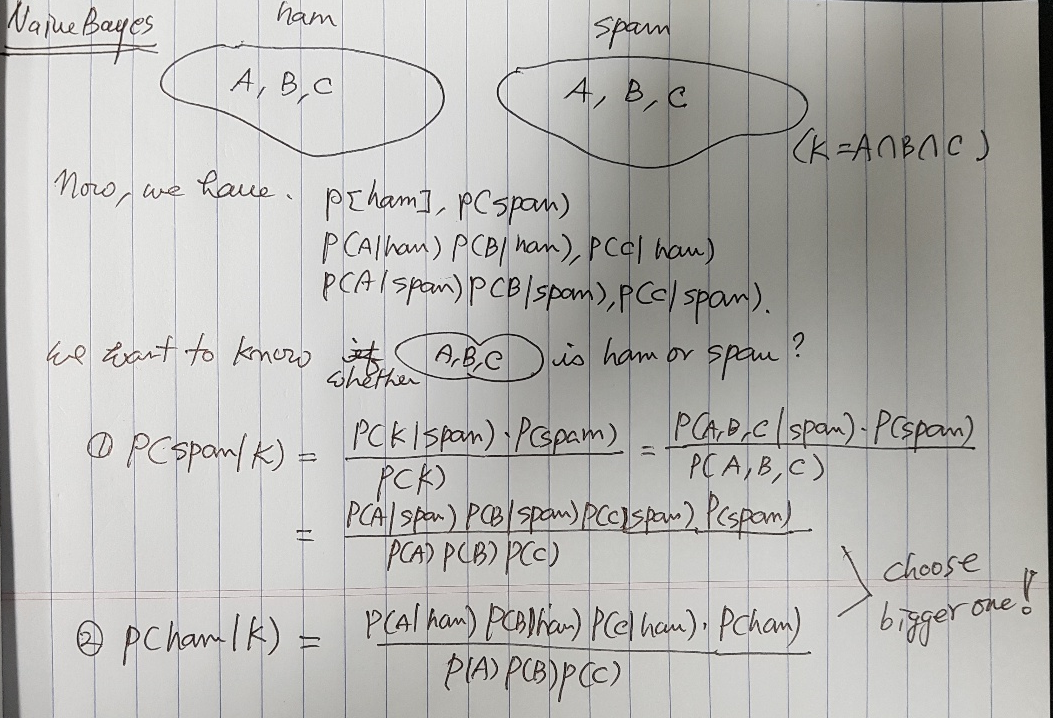

- Naive Bayes classifier for multinomial models

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

tfidf = TfidfVectorizer(stop_words="english")
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.transform(x_test)

mnb = MultinomialNB()
mnb.fit(x_train_tf, y_train)

MultinomialNB()

In [8]:
from sklearn import metrics
y_pred = mnb.predict(x_test_tf) # 학습된 모델을 이용하여 예측
print(metrics.classification_report(y_test, y_pred)) # 분류 성능 평가

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1442
        spam       1.00      0.75      0.86       231

    accuracy                           0.97      1673
   macro avg       0.98      0.88      0.92      1673
weighted avg       0.97      0.97      0.96      1673



In [9]:
print ("score :", mnb.score(x_test_tf, y_test))
print ("score :", mnb.score(x_train_tf, y_train))

score : 0.9659294680215182
score : 0.9820558831068956


In [10]:
from sklearn.naive_bayes import GaussianNB

tfidf = TfidfVectorizer(stop_words="english")
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.transform(x_test)

gnb = GaussianNB()
gnb.fit(x_train_tf.toarray(), y_train)
print ("score :", gnb.score(x_test_tf.toarray(), y_test))
print ("score :", gnb.score(x_train_tf.toarray(), y_train))

score : 0.8834429169157203
score : 0.9464239938477313


- MultinomialNB works better

## CountVectorizer() and Gaussian NB algorithm

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

In [12]:
count = CountVectorizer(min_df=10)    # 10번 이하로 발생한 단어 무시
x_train_count = count.fit_transform(x_train)
x_test_count = count.transform(x_test)
clf = MultinomialNB()
clf.fit(x_train_count.toarray(), y_train)
print(clf.score(x_test_count.toarray(), y_test).round(4))

0.9821


In [13]:
count = CountVectorizer(min_df=10)    # 10번 이하로 발생한 단어 무시
x_train_count = count.fit_transform(x_train)
x_test_count = count.transform(x_test)
clf = GaussianNB()
clf.fit(x_train_count.toarray(), y_train)
print(clf.score(x_test_count.toarray(), y_test).round(4))

0.7585


# comparing many algorithms
- NB algorithms is the best for this problem

In [14]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- NLTK: natural language toolkit

In [15]:
import seaborn as sns
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

- stemming and lemmatization: text normalization
- (ex) the boy's cars are different colors -> the boy car be differ color

- to remove punctuation marks from a string:
- you have to create a translation table using maketrans that you pass to the str.translate method.
- In Python, string. punctuation will give the all sets of punctuation

In [17]:
# just for your reference (to remove punctuations)

translator = str.maketrans('', '', string.punctuation) # '' ->'', string.punctuation -> NaN
# This uses the 3-argument version of str.maketrans
# with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 
# 'z' is a string to be removed (mapped to None)
s = 'string with "punctuation" inside of it! Does this work? I hope so.'
print(s.translate(translator))

# example: translation table

intab = "aeiou"
outtab = "12345"
trantab = str.maketrans(intab, outtab, 'w')  # remove 'w'

str = "this is string example....wow!!!"
print (str.translate(trantab))


# similar expression
import string
if __name__ == '__main__':
    s = "Hello, World.....!?"
    s = ''.join(c for c  in s if c not in string.punctuation)
    print(s)

string with punctuation inside of it Does this work I hope so
th3s 3s str3ng 2x1mpl2....4!!!
Hello World


In [18]:
__name__

'__main__'

In [19]:
def text_process(text):
    translator = str.maketrans('', '', string.punctuation)  # make translation table, remove punct.
    text = text.translate(translator)
    # change all letters to lower cases, and remove stopwords
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)

In [20]:
# just for texting the defined function
text_process("I am a man..... and you  are a woman... We love each other. Right?")

'man woman love Right'

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [22]:
svc = SVC(kernel='sigmoid', gamma=1.0)   # SVM classifier
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [23]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [24]:
# train 데이터를 각각의 classifier에 fit하기 위한 함수
def train_classifier(clf, X_train, y_train): 
    clf.fit(X_train, y_train)

#feature를 각각의 classifier를 이용해 예측
def predict_labels(clf, features):
    return (clf.predict(features))

#pred_scores 리스트를 만들고, 분류기의 예측 결과들을 리스트의 원소로 함
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, x_train_tf, y_train) # train데이터를 이용해 분류
    pred = predict_labels(v,x_test_tf) #예측
    pred_scores.append((k, accuracy_score(y_test,pred))) # accuracy 스코어를 리스트에 추가

In [25]:
pred_scores

[('SVC', 0.9790794979079498),
 ('KN', 0.9145248057381948),
 ('NB', 0.982068141063957),
 ('DT', 0.9653317393903168),
 ('LR', 0.9533771667662881),
 ('RF', 0.9736999402271369),
 ('AdaBoost', 0.9623430962343096),
 ('BgC', 0.968320382546324),
 ('ETC', 0.9748953974895398)]

In [26]:
pd.DataFrame(pred_scores)

,0,1
0,SVC,0.979079
1,KN,0.914525
2,NB,0.982068
3,DT,0.965332
4,LR,0.953377
5,RF,0.973700
6,AdaBoost,0.962343
7,BgC,0.968320
8,ETC,0.974895


In [27]:
#각각의 classifier 스코어 출력
# df.from_items(): Construct a DataFrame from a list of tuples.

df = pd.DataFrame.from_records(pred_scores, columns=['classifier', 'Score'])
df = df.set_index('classifier')
df

,Score
classifier,
SVC,0.979079
KN,0.914525
NB,0.982068
DT,0.965332
LR,0.953377
RF,0.973700
AdaBoost,0.962343
BgC,0.968320
ETC,0.974895


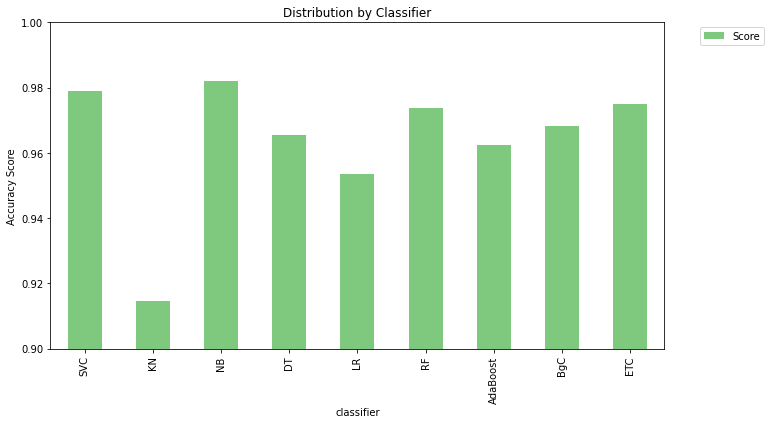

In [28]:
#classifier에 따른 accuracy 히스토그램
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2) # borderaxespad=0.)
# %config InlineBackend.figure_format = 'retina'

# 연습

In [29]:
import string
obj = "python"
before = "thon"
after = "zzyy"
sen = obj.maketrans(before, after)   # construct translation table
sen

{104: 122, 110: 121, 111: 121, 116: 122}

In [30]:
obj.translate(sen)                   # translate base on the table

'pyzzyy'

### Replacing words or characters in Python
- maketrans(): maketrans() function is used to construct the transition table i.e specify the list of 
  characters that need to be replaced in the whole string or the characters that need to be deleted 
  from the string
- Translate using maketrans(): To translate the characters in the string translate() is used to make the
  translations. This function uses the translation mapping specified using the maketrans().

In [31]:
# Python3 code to demonstrate translations using maketrans() and translate() 
  
# specify to translate chars 
str1 = "wy"
# specify to to replace with 
str2 = "gf"
# delete chars 
str3 = "u"
# target string  
trg = "weeksyourweeks"
  
# using maketrans() to construct translate table 
table = trg.maketrans(str1, str2, str3) 
  
# Printing original string  
print ("The string before translating is : ", end ="") 
print (trg) 
  
# using translate() to make translations. 
print ("The string after translating is : ", end ="") 
print (trg.translate(table)) 

The string before translating is : weeksyourweeks
The string after translating is : geeksforgeeks


In [32]:
# 문자열 바꾸기
'Hello, world!'.replace('world', 'Python')

'Hello, Python!'

In [33]:
# 문자 바꾸기
table = str.maketrans('aeiou', '12345')
'apple'.translate(table)

'1ppl2'

In [34]:
# 문자열 분리하기
'apple, pear, grape, pineapple, orange'.split(', ')

['apple', 'pear', 'grape', 'pineapple', 'orange']

In [35]:
# 구분자 문자열과 문자열 리스트 연결하기
' '.join(['apple', 'pear', 'grape', 'pineapple', 'orange'])
'-'.join(['apple', 'pear', 'grape', 'pineapple', 'orange'])

'apple-pear-grape-pineapple-orange'

In [36]:
# 양쪽 공백 삭제하기 & 양쪽 특정문자 삭제하기
'   Python   '.strip()
', python.'.strip(',.')

' python'

In [37]:
# 구두점을 간단하게 삭제하기
import string
', python.'.strip(string.punctuation)

' python'

In [38]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
 ', python.'.strip(string.punctuation + ' ')

'python'

In [40]:
', python.'.strip(string.punctuation).strip()   # 체인형

'python'

In [41]:
def text_process(text):
    #구분자 제거
    text = text.translate(str.maketrans('', '', string.punctuation))
    #모든 텍스트를 소문자로 바꾸고, stopword를 제거함
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
help(enumerate(stopwords.words('english'),1))

Help on enumerate object:

class enumerate(object)
 |  enumerate(iterable, start=0)
 |  
 |  Return an enumerate object.
 |  
 |    iterable
 |      an object supporting iteration
 |  
 |  The enumerate object yields pairs containing a count (from start, which
 |  defaults to zero) and a value yielded by the iterable argument.
 |  
 |  enumerate is useful for obtaining an indexed list:
 |      (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [44]:
text_process(' ,,,text...  ')

'text'

In [45]:
df = pd.DataFrame(np.arange(12).reshape(3,4),
                 columns=['A','B','C','D'])
df

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
